In [121]:
import pandas as pd
import numpy as np
import openpyxl

data = pd.read_excel('FR2209_assessment_data.xlsx', index_col=0, header=0)
data = data.iloc[:121,:]

stocks = data.loc[:,['BYD','DNB','IAG','SAM','CHM','X']]

returns = stocks.pct_change()
std = returns.std()
mean = returns.mean()


returns



,BYD,DNB,IAG,SAM,CHM,X
date,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.062767,0.065856,0.075332,0.085985,0.065668,-0.065486
2013-03-29,0.258752,-0.017578,0.060728,0.055986,0.109166,-0.064299
2013-04-30,0.451028,0.115651,0.098254,-0.015033,-0.026455,-0.087180
2013-05-31,0.085833,0.018199,0.005871,0.059864,0.024632,-0.003596
...,...,...,...,...,...,...
2022-08-31,-0.019456,-0.092640,-0.129345,0.170433,-0.068707,-0.030908
2022-09-30,-0.121827,-0.130526,-0.159940,-0.011528,-0.170479,-0.207696
2022-10-31,0.212171,0.037127,0.319528,-0.112438,-0.085301,0.123621


In [122]:
#asssume the risk free of 0.5%, calculate the excess return for each stock
R_f = 0.05
excessret = mean - R_f /12
excessret

BYD    0.582069
DNB    0.398071
IAG    0.257447
SAM    0.248595
CHM    0.197914
X      0.189037
dtype: float64

In [123]:
#sharpe for each stock
sharpe = excessret/returns.std()
sharpe

BYD    0.093848
DNB    0.087026
IAG    0.133022
SAM    0.108607
CHM    0.110028
X      0.094973
dtype: float64

In [124]:
#returns variance / covariance matrix 
VarCov_Mat = returns.cov()
VarCov_Mat

,BYD,DNB,IAG,SAM,CHM,X
BYD,38.468336,28.357208,7.463509,-0.101051,-0.034629,12.280237
DNB,28.357208,20.922912,5.493531,-0.077406,-0.023190,9.055468
IAG,7.463509,5.493531,3.745670,-0.012002,-0.036343,2.407210
SAM,-0.101051,-0.077406,-0.012002,5.239277,0.368444,0.004649
CHM,-0.034629,-0.023190,-0.036343,0.368444,3.235537,-0.010240
X,12.280237,9.055468,2.407210,0.004649,-0.010240,3.961793


In [125]:
import numpy as np
from itertools import combinations, permutations, product

# Generate permutations of weights in multiples of 0.1
permutations = product(range(11), repeat=len(mean))

# Filter permutations where the sum equals 10 (1 in multiples of 0.1)
valid_permutations = [p for p in permutations if sum(p) == 10]

# Convert permutations to multiples of 0.1 and normalize each permutation
normalized_permutations = [[weight / 10 for weight in p] for p in valid_permutations]

print(normalized_permutations)

[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.1, 0.9], [0.0, 0.0, 0.0, 0.0, 0.2, 0.8], [0.0, 0.0, 0.0, 0.0, 0.3, 0.7], [0.0, 0.0, 0.0, 0.0, 0.4, 0.6], [0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.6, 0.4], [0.0, 0.0, 0.0, 0.0, 0.7, 0.3], [0.0, 0.0, 0.0, 0.0, 0.8, 0.2], [0.0, 0.0, 0.0, 0.0, 0.9, 0.1], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.1, 0.0, 0.9], [0.0, 0.0, 0.0, 0.1, 0.1, 0.8], [0.0, 0.0, 0.0, 0.1, 0.2, 0.7], [0.0, 0.0, 0.0, 0.1, 0.3, 0.6], [0.0, 0.0, 0.0, 0.1, 0.4, 0.5], [0.0, 0.0, 0.0, 0.1, 0.5, 0.4], [0.0, 0.0, 0.0, 0.1, 0.6, 0.3], [0.0, 0.0, 0.0, 0.1, 0.7, 0.2], [0.0, 0.0, 0.0, 0.1, 0.8, 0.1], [0.0, 0.0, 0.0, 0.1, 0.9, 0.0], [0.0, 0.0, 0.0, 0.2, 0.0, 0.8], [0.0, 0.0, 0.0, 0.2, 0.1, 0.7], [0.0, 0.0, 0.0, 0.2, 0.2, 0.6], [0.0, 0.0, 0.0, 0.2, 0.3, 0.5], [0.0, 0.0, 0.0, 0.2, 0.4, 0.4], [0.0, 0.0, 0.0, 0.2, 0.5, 0.3], [0.0, 0.0, 0.0, 0.2, 0.6, 0.2], [0.0, 0.0, 0.0, 0.2, 0.7, 0.1], [0.0, 0.0, 0.0, 0.2, 0.8, 0.0], [0.0, 0.0, 0.0, 0.3, 0.0, 0.7], [0.0, 0

In [126]:
weighted_ret = [[weight * mean for weight, mean in zip(p, mean)] for p in normalized_permutations]
# Sum of weights method
portfolio_rets = [sum(weights) for weights in weighted_ret]
portfolio_rets

[0.19320342310959984,
 0.19409114302553404,
 0.1949788629414682,
 0.19586658285740238,
 0.1967543027733366,
 0.19764202268927078,
 0.19852974260520498,
 0.19941746252113918,
 0.20030518243707338,
 0.20119290235300757,
 0.20208062226894175,
 0.19915927114639384,
 0.200046991062328,
 0.2009347109782622,
 0.20182243089419638,
 0.2027101508101306,
 0.20359787072606478,
 0.20448559064199895,
 0.20537331055793315,
 0.20626103047386735,
 0.20714875038980154,
 0.2051151191831878,
 0.20600283909912198,
 0.2068905590150562,
 0.20777827893099038,
 0.20866599884692458,
 0.20955371876285878,
 0.21044143867879295,
 0.21132915859472712,
 0.21221687851066134,
 0.21107096721998178,
 0.21195868713591598,
 0.21284640705185018,
 0.21373412696778438,
 0.21462184688371855,
 0.21550956679965275,
 0.21639728671558695,
 0.21728500663152112,
 0.21702681525677578,
 0.21791453517270998,
 0.21880225508864415,
 0.21968997500457838,
 0.22057769492051255,
 0.22146541483644672,
 0.22235313475238092,
 0.222982663293569

In [127]:
# w^T mean method
portfolio_rets2 = np.dot(normalized_permutations, mean)

In [128]:
WOmega = np.dot(normalized_permutations, VarCov_Mat)
Portfolio_std_Matrix= np.sqrt(WOmega * normalized_permutations)
portfolio_std = [sum(std) for std in Portfolio_std_Matrix]
portfolio_std

[1.9904252299132272,
 1.9684211812746544,
 1.9492932310411477,
 1.930157521646584,
 1.9110198128935683,
 1.8918811889394438,
 1.8727419095896816,
 1.8536018575190873,
 1.8344602718531822,
 1.815312944487065,
 1.7987597478970088,
 2.0213062779814317,
 2.0174615033674073,
 2.005935177980957,
 1.994133465813224,
 1.98211275513163,
 1.9698971621825225,
 1.9575034821735806,
 1.9449448827759195,
 1.932230035096219,
 1.9215871630031942,
 2.0511747457529452,
 2.0572433154460934,
 2.0462367337268437,
 2.0348488650687764,
 2.023273716213964,
 2.0115569790850847,
 1.9997171191300716,
 1.9877627020503712,
 1.9775384708869814,
 2.0810424541501673,
 2.096503792969437,
 2.0860894555103275,
 2.075004738338164,
 2.063675196711663,
 2.052197359967411,
 2.040605303218568,
 2.030374037239673,
 2.1109099551068686,
 2.1353442568881027,
 2.1256481653919987,
 2.114884318763339,
 2.1037707593867467,
 2.0924729986678745,
 2.082131214528971,
 2.140777348552131,
 2.1738216765801357,
 2.1649588373103064,
 2.154555

Text(0, 0.5, 'Returns')

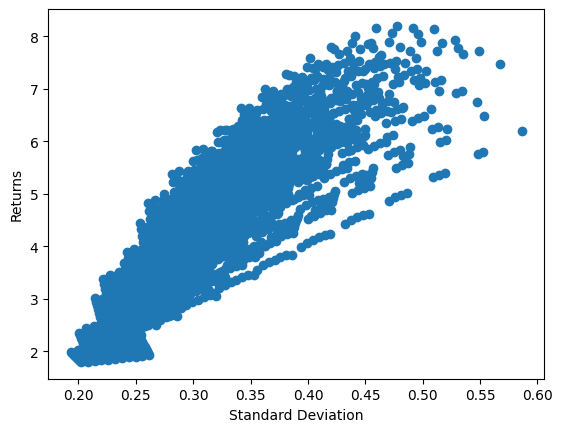

In [129]:
import matplotlib.pyplot as plt
plt.scatter( portfolio_rets, portfolio_std )
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [130]:
sharpe_portolios = ((portfolio_rets2 - R_f / 12))/ portfolio_std
sharpe_portolios

array([0.09497305, 0.09648569, 0.09788789, ..., 0.08476326, 0.07547901,
       0.09384759])